<a href="https://colab.research.google.com/github/athulkrishna027/flight-ticket-price-prediction/blob/main/miniprojectX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

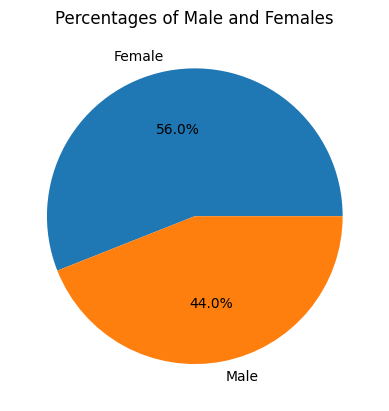

In [ ]:
plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct ="%.01f%%")
plt.title('Percentages of Male and Females' );

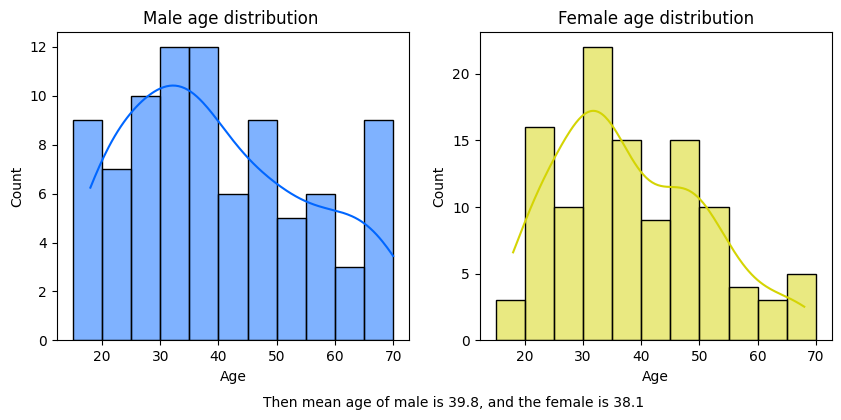

In [ ]:

male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='#0066ff', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");
plt.text(-25,-5,f"Then mean age of male is {round(male.mean(),1)}, and the female is {round(female.mean(),1)}")

plt.show()

# Distribution of age with respect to gender

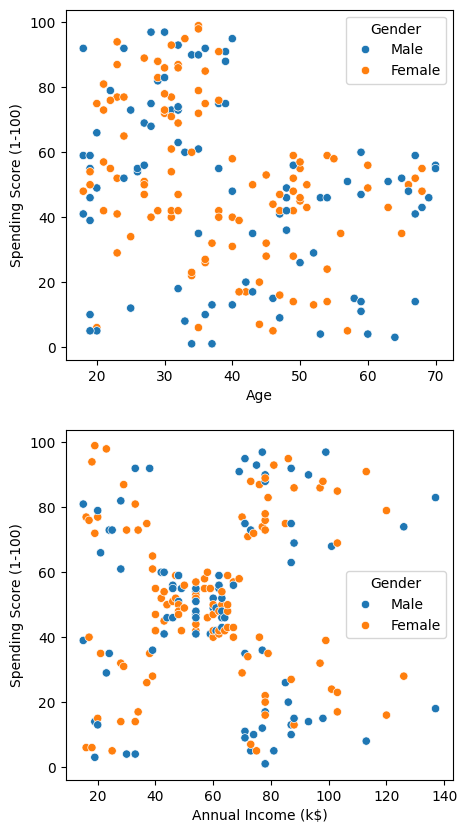

In [ ]:
fig,ax=plt.subplots(2,figsize=(5,10))
sns.scatterplot(ax=ax[0],data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
sns.scatterplot(ax=ax[1],data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender')
plt.show()

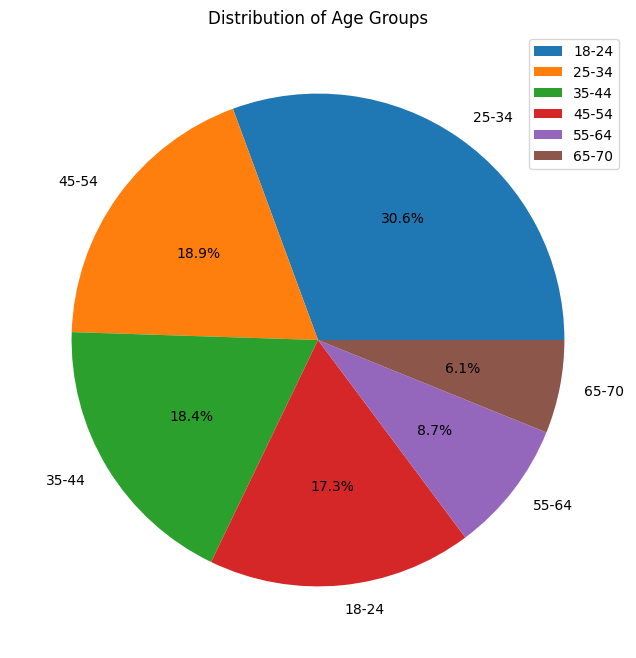

In [ ]:


df['Age_Group'] = pd.cut(df.Age, bins = [18, 25, 35, 45, 55, 65, 70], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

plt.figure(figsize = (8, 8))
plt.pie(df.Age_Group.value_counts(), labels = df.Age_Group.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

# Spending Score by age group


In [ ]:
km=KMeans(n_clusters=5)
df['cluster']=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,cluster
0,1,Male,19,15,39,18-24,3
1,2,Male,21,15,81,18-24,4
2,3,Female,20,16,6,18-24,3
3,4,Female,23,16,77,18-24,4
4,5,Female,31,17,40,25-34,3


In [ ]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [ ]:
km.inertia_

44448.4554479337

In [ ]:
df['cluster'].unique()

array([3, 4, 1, 2, 0], dtype=int32)

In [ ]:
df0=df[df['cluster']==0][['Annual Income (k$)','Spending Score (1-100)','cluster']]
df1=df[df['cluster']==1][['Annual Income (k$)','Spending Score (1-100)','cluster']]
df2=df[df['cluster']==2][['Annual Income (k$)','Spending Score (1-100)','cluster']]
df3=df[df['cluster']==3][['Annual Income (k$)','Spending Score (1-100)','cluster']]
df4=df[df['cluster']==4][['Annual Income (k$)','Spending Score (1-100)','cluster']]

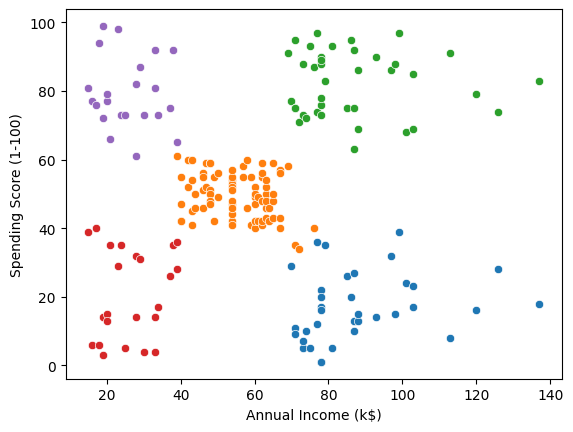

In [ ]:
sns.scatterplot(data=df0,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df2,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df3,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df4,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()

In [ ]:
sse=[]
for k in range(1,20):
    kmk=KMeans(n_clusters=k)
    kmk.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmk.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30552.714025467285,
 24995.96978113596,
 21818.114588452176,
 19762.50881338412,
 17584.589416163646,
 15830.061351769418,
 14409.426667776665,
 12825.554989618224,
 11718.697898415929,
 11106.725872885978,
 9869.221659137962,
 9149.77948187078,
 8673.61450265421]

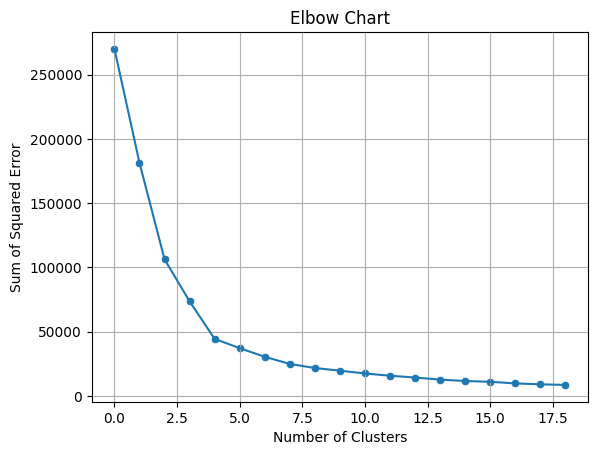

In [ ]:
sns.lineplot(data=sse)
sns.scatterplot(data=sse)
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Chart')
plt.show()

#From the above Elbow Chart we can use 5 as number of clusters for better clustering or categorization.

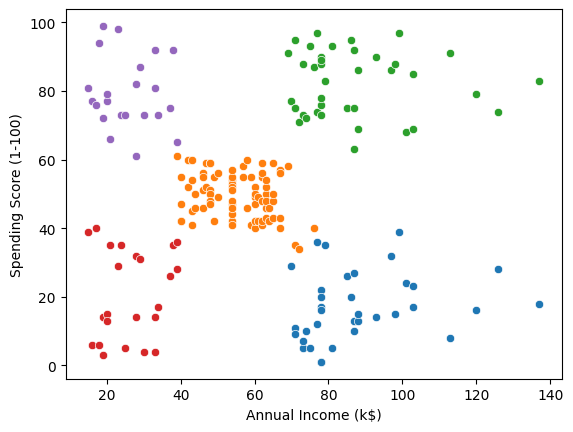

In [ ]:
sns.scatterplot(data=df0,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df2,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df3,x='Annual Income (k$)',y='Spending Score (1-100)')
sns.scatterplot(data=df4,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()

#conclusion
Target Audience is the one having Spending Score greater than 60.
We can't decide the Spending Score just based on their Annual Income.

In [ ]:
X= df.iloc[:, [3,4]].values

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Visualization

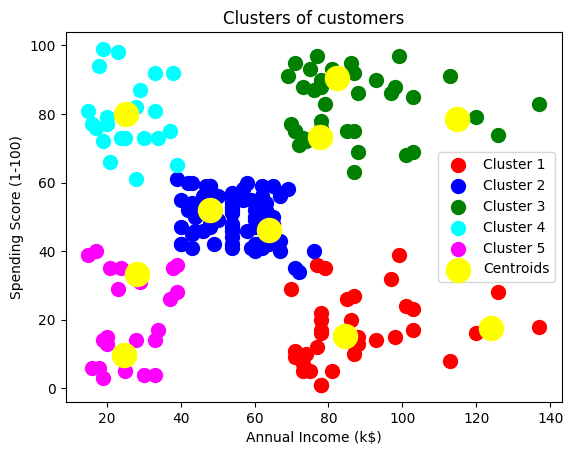

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
 pip install Flask